# Data Pre-Processing

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [31]:
df = pd.read_csv("Assignment Data/fake reviews dataset.csv")

## Data Exploration

In [32]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [34]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [35]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [36]:
df['category'].value_counts()

category
Kindle_Store_5                  4730
Books_5                         4370
Pet_Supplies_5                  4254
Home_and_Kitchen_5              4056
Electronics_5                   3988
Sports_and_Outdoors_5           3946
Tools_and_Home_Improvement_5    3858
Clothing_Shoes_and_Jewelry_5    3848
Toys_and_Games_5                3794
Movies_and_TV_5                 3588
Name: count, dtype: int64

In [37]:
df['label'].value_counts()

label
CG    20216
OR    20216
Name: count, dtype: int64

In [38]:
df['rating'].value_counts()

rating
5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: count, dtype: int64

In [39]:
df.rename(columns = { 'text_' : 'text'}, inplace = True)
df

,category,rating,label,text
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


In [40]:
replace_map = {
    'Home_and_Kitchen_5': 'Home_and_Kitchen',
    'Kindle_Store_5': 'Kindle_Store',
    'Books_5': 'Books',
    'Pet_Supplies_5': 'Pet_Supplies',
    'Electronics_5': 'Electronics',
    'Sports_and_Outdoors_5': 'Sports_and_Outdoors',
    'Tools_and_Home_Improvement_5': 'Tools_and_Home_Improvement',
    'Clothing_Shoes_and_Jewelry_5': 'Clothing_Shoes_and_Jewelry',
    'Toys_and_Games_5': 'Toys_and_Games',
    'Movies_and_TV_5': 'Movies_and_TV'
}

for old_value, new_value in replace_map.items():
    df = df.replace(old_value, new_value, regex=True)

In [41]:
df.shape

(40432, 4)

## Data Cleaning

In [42]:
#remove URL

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df["text"] = df["text"].apply(lambda text: remove_urls(text))

In [43]:
df.tail()

,category,rating,label,text
40427,Clothing_Shoes_and_Jewelry,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry,1.0,CG,I liked nothing about this dress. The only rea...
40431,Clothing_Shoes_and_Jewelry,5.0,OR,I work in the wedding industry and have to wor...


In [44]:
# remove digits

df['text'] = df['text'].replace(to_replace=r'\d', value='', regex=True)

In [45]:
# remove punctuation

def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [46]:
df['text'][0], clean_text(df['text'][0])

('Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty',
 'Love Well made sturdy comfortable love itVery pretty')

In [47]:
df['text'].head().apply(clean_text)

0    Love Well made sturdy comfortable love itVery ...
1    love great upgrade original Ive mine couple years
2              pillow saved back love look feel pillow
3          Missing information use great product price
4                 nice set Good quality set two months
Name: text, dtype: object

In [48]:
df['text'] = df['text'].astype(str)

In [49]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

In [50]:
preprocess(df['text'][4])

'Very nice set Good quality We set two months'

In [51]:
df['text'][:10000] = df['text'][:10000].apply(preprocess)

In [52]:
df['text'][10001:20000] = df['text'][10001:20000].apply(preprocess)

In [53]:
df['text'][20001:30000] = df['text'][20001:30000].apply(preprocess)

In [54]:
df['text'][30001:40000] = df['text'][30001:40000].apply(preprocess)

In [55]:
df['text'][40001:40432] = df['text'][40001:40432].apply(preprocess) 

In [56]:
df['text'] = df['text'].str.lower()

In [57]:
df.head()

,category,rating,label,text
0,Home_and_Kitchen,5.0,CG,love well made sturdy comfortable i love very ...
1,Home_and_Kitchen,5.0,CG,love great upgrade original i 've mine couple ...
2,Home_and_Kitchen,5.0,CG,this pillow saved back i love look feel pillow
3,Home_and_Kitchen,1.0,CG,missing information use great product price i
4,Home_and_Kitchen,5.0,CG,very nice set good quality we set two months


In [58]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['text'] = df['text'].apply(lambda x: stem_words(x))

In [59]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["text"] = df["text"].apply(lambda text: lemmatize_words(text))

In [60]:
df['text'].head()

0    love well made sturdi comfort i love veri pretti
1      love great upgrad origin i 've mine coupl year
2        thi pillow save back i love look feel pillow
3               miss inform use great product price i
4         veri nice set good qualiti we set two month
Name: text, dtype: object

In [61]:
#check duplicated rows
print(df.duplicated().sum())
df[df.duplicated()]

28


,category,rating,label,text
6025,Sports_and_Outdoors,5.0,CG,thi realli good starter kit lot tool lot optio...
6708,Sports_and_Outdoors,5.0,CG,great complaint comfort phone fit pocket comfo...
12548,Movies_and_TV,5.0,CG,one best movi year not everyon but i pretti im...
16443,Tools_and_Home_Improvement,5.0,CG,thi sturdi saw the problem come small screw dr...
19742,Pet_Supplies,5.0,CG,my dog love kept occupi long time she chase
19802,Pet_Supplies,5.0,CG,my dog love kept occupi long time she chase
19803,Pet_Supplies,5.0,CG,my dog love kept occupi long time she chase
19967,Pet_Supplies,5.0,CG,my dog love kept occupi long time she mind
20242,Pet_Supplies,5.0,CG,my dog love kept occupi long time she chase
22305,Pet_Supplies,5.0,OR,got give mth old chihuahua diagnos elbow dyspl...


In [62]:
# drop duplicated rows
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [63]:
# check rare words

freq = pd.Series(' '.join(df['text']).split()).value_counts()
less_freq = list(freq[freq ==1].index)
less_freq

['smart-mouth',
 'shoehorn',
 'danika',
 'deshydrat',
 'century.i',
 'server-bas',
 'well-thought',
 'himself',
 'detriment',
 'face-to-fac',
 "'frenemi",
 'hunni',
 'dedicaci',
 'themes-rom',
 'rebelli',
 'spoke-yeah',
 'com/images/i/ejwpsrb',
 'voldor',
 'intrins',
 'cute-i',
 'seligman',
 'valet-h',
 'quickbook',
 'look/feel',
 'rierdan',
 'best-friend',
 'iren',
 'agricultur',
 'mid-s.',
 'video-block-rboevzdogp',
 'gaelic',
 'squander',
 'doomed.',
 'paddi',
 'point-of-view',
 'evri',
 'contractu',
 'navel-gaz',
 'anarchon',
 'puriti',
 'siden',
 'teen/young',
 'fors',
 'unment',
 'justif',
 'amnesiac',
 'nal',
 'screencutt',
 'conting',
 'doubli',
 'suzzan',
 'hole-sport',
 'schizophrenia',
 'humourous-',
 'lewiski',
 'multi-millionair',
 'marko',
 'winnebago',
 'lsa',
 'orgon',
 'lebinizian',
 'katia',
 'reintegr',
 'indoctrin',
 'bowman',
 'dornan',
 'germain',
 'lewinski',
 'tidewat',
 'comin',
 'wool-fre',
 'vril',
 'witcheri',
 'shoe.th',
 'bighorn',
 'doin',
 'hemmin',
 'pa

In [64]:
# remove rare words

df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in less_freq))

In [65]:
# add text length and word count column

df['text_len'] = df['text'].astype(str).apply(len)
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

In [66]:
# drop duplicated rows
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [67]:
df.head()

,category,rating,label,text,text_len,word_count
0,Home_and_Kitchen,5.0,CG,love well made sturdi comfort i love veri pretti,48,9
1,Home_and_Kitchen,5.0,CG,love great upgrad origin i 've mine coupl year,46,9
2,Home_and_Kitchen,5.0,CG,thi pillow save back i love look feel pillow,44,9
3,Home_and_Kitchen,1.0,CG,miss inform use great product price i,37,7
4,Home_and_Kitchen,5.0,CG,veri nice set good qualiti we set two month,43,9


## EDA

In [68]:
# sentiment analysis by addinf polarity to each text corpus
from textblob import TextBlob, Word, Blobber

df['polarity'] = df['text'].map(lambda text: TextBlob(text).sentiment.polarity)
df.tail()

,category,rating,label,text,text_len,word_count,polarity
40427,Clothing_Shoes_and_Jewelry,4.0,OR,i read review say bra ran small i order two ba...,993,197,0.178319
40428,Clothing_Shoes_and_Jewelry,5.0,CG,i n't sure exactli would it littl larg small s...,720,142,0.291975
40429,Clothing_Shoes_and_Jewelry,2.0,OR,you wear hood wear hood wear jacket without ho...,1221,213,0.160251
40430,Clothing_Shoes_and_Jewelry,1.0,CG,i like noth dress the reason i gave star i ord...,743,161,0.292168
40431,Clothing_Shoes_and_Jewelry,5.0,OR,i work wed industri work long day foot outsid ...,965,189,0.186429


In [69]:
df['text'] = df['text'].str.replace('[^\w\s]', '')

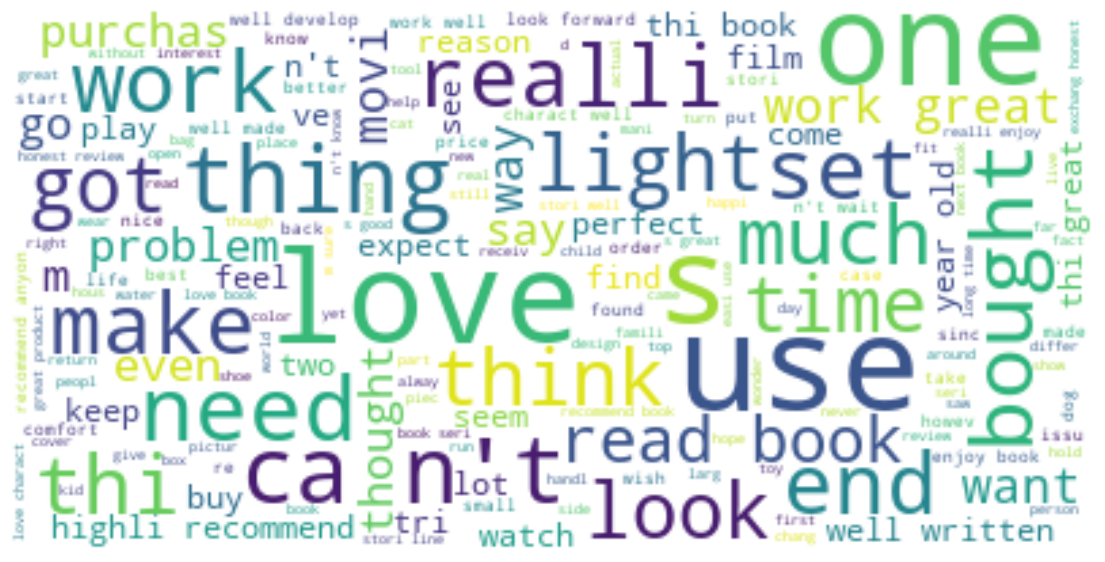

In [70]:
from wordcloud import WordCloud, ImageColorGenerator

text = " ".join(review for review in df['text'])
wordcl = WordCloud(background_color='white', max_font_size = 50, max_words = 5000).generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

In [71]:
# unigram chart

def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['text'], 50)
df_unigram = pd.DataFrame(common_words, columns = ['text', 'count'])
df_unigram.head()

,text,count
0,the,31931
1,love,19059
2,it,17649
3,book,17648
4,great,17145


<Axes: title={'center': "Unigram's Frequency"}, xlabel='Unigram', ylabel='Count'>

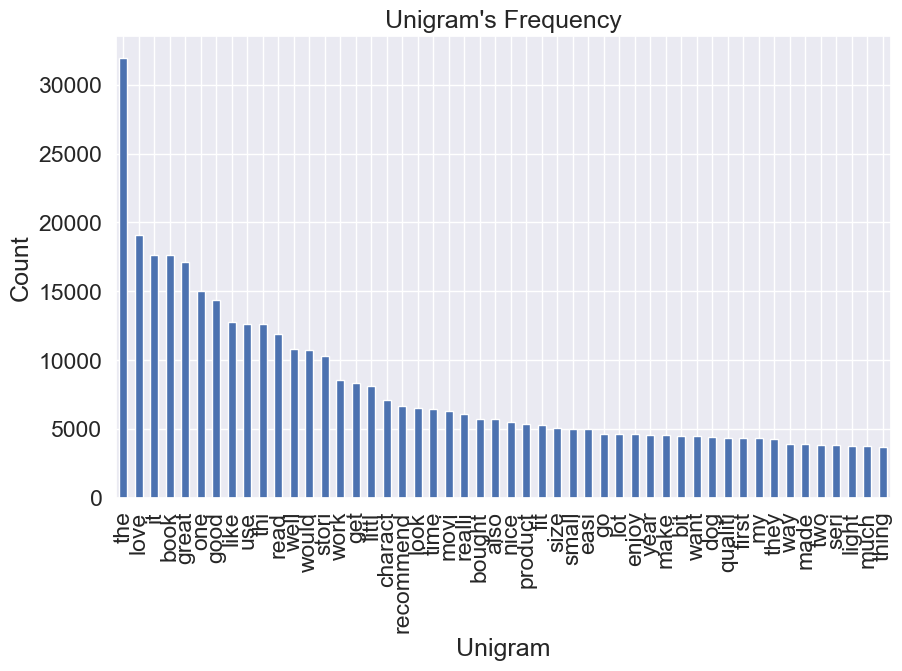

In [72]:
# bar chart

df_unigram.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Unigram",
    ylabel = "Count",
    title = "Unigram's Frequency"
)

In [73]:
# bigram chart

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(df['text'], 50)
df_bigram = pd.DataFrame(common_words2, columns=['text', "Count"])
df_bigram.head()

,text,Count
0,would recommend,2958
1,the stori,2217
2,read book,1851
3,work great,1799
4,the charact,1710


<Axes: title={'center': 'Bigrams Frequency'}, xlabel='Bigram', ylabel='Count'>

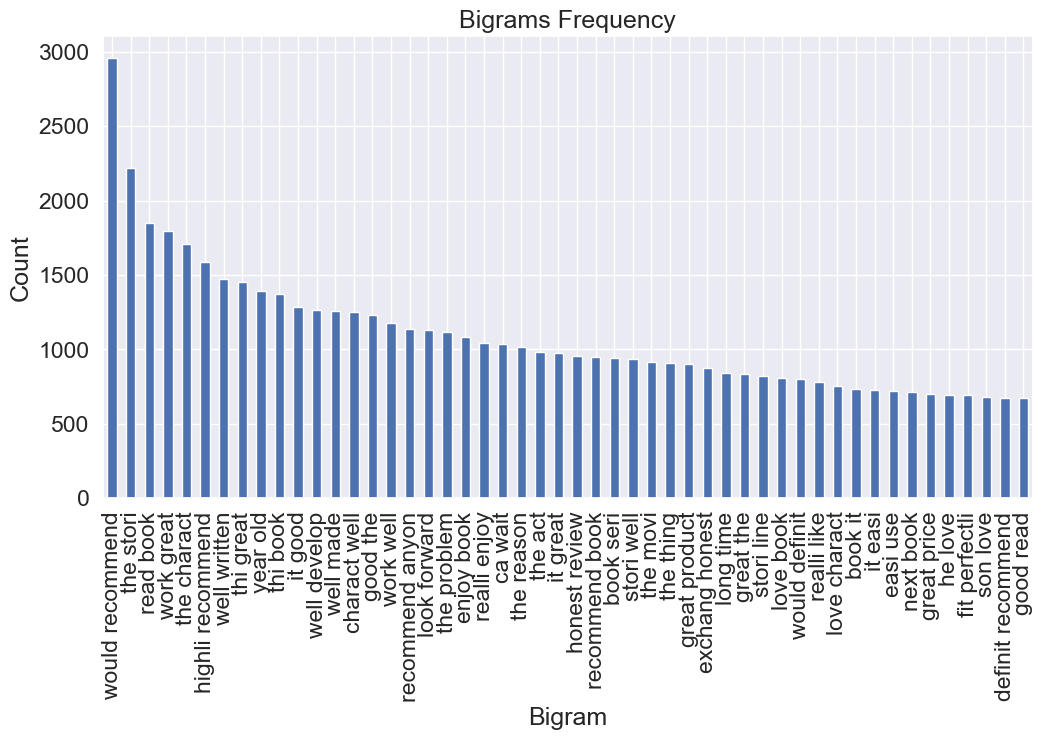

In [74]:
df_bigram.groupby('text').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Bigram",
    ylabel = "Count",
    title = "Bigrams Frequency"
)

In [75]:
# trigram chart

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words3 = get_top_n_trigram(df['text'], 50)
df_trigram = pd.DataFrame(common_words3, columns = ['text' , 'Count'])

<Axes: title={'center': 'Trigrams Frequency'}, xlabel='Trigram', ylabel='Count'>

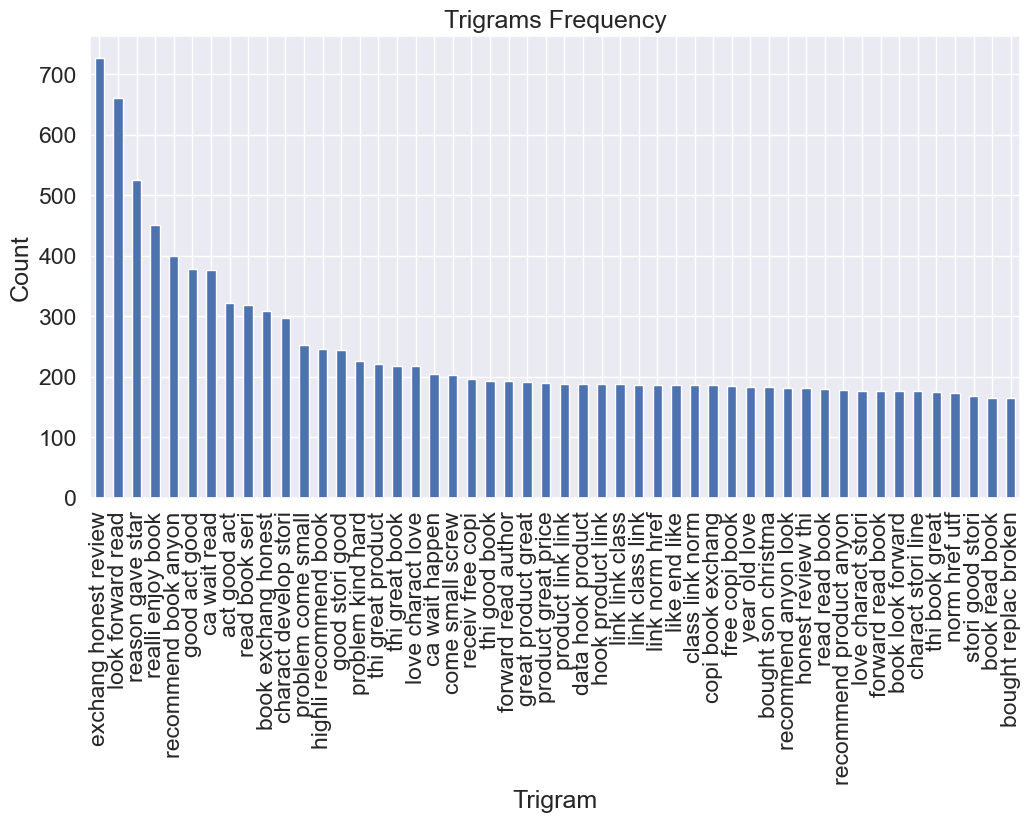

In [76]:
#trigram graph

df_trigram.groupby('text').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Trigram",
    ylabel = "Count",
    title = "Trigrams Frequency"
)

<Axes: title={'center': 'Frequency of the Parts of Speech'}, xlabel='Part Of Speech', ylabel='Frequency'>

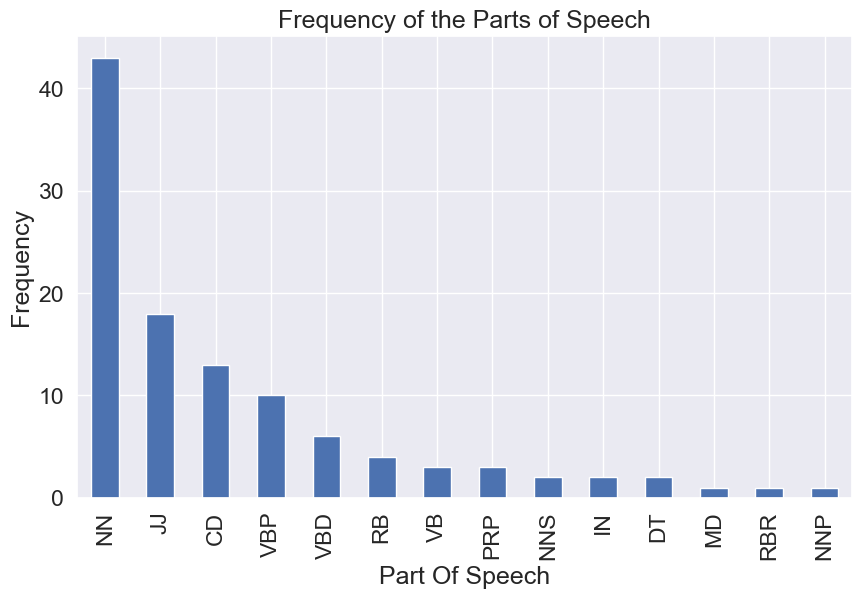

In [77]:
blob = TextBlob(str(df['text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word', 'pos'])
pos_df = pos_df.pos.value_counts()[:50]
pos_df.plot(kind='bar',
            xlabel = "Part Of Speech",
           ylabel = "Frequency",
           title = "Frequency of the Parts of Speech",
           figsize=(10, 6))

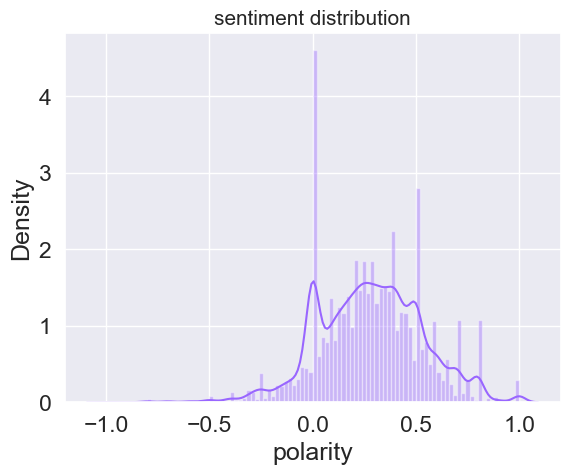

In [78]:
# sentiment distribution

sns.distplot(x=df['polarity'], bins=100, color='#9966ff')
plt.title('sentiment distribution', size=15)
plt.xlabel('polarity')
plt.show()

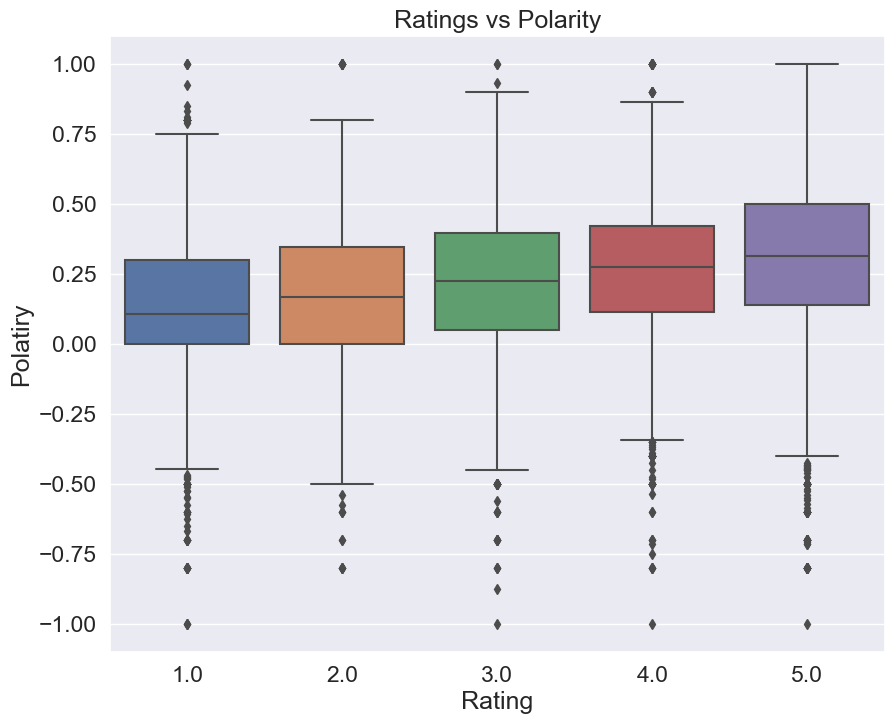

In [79]:
# ploarity vs rating

plt.figure(figsize = (10, 8))
sns.set_style('whitegrid')
sns.set(font_scale = 1.5)
sns.boxplot(x = 'rating', y = 'polarity', data = df)
plt.xlabel("Rating")
plt.ylabel("Polatiry")
plt.title("Ratings vs Polarity")
plt.show()

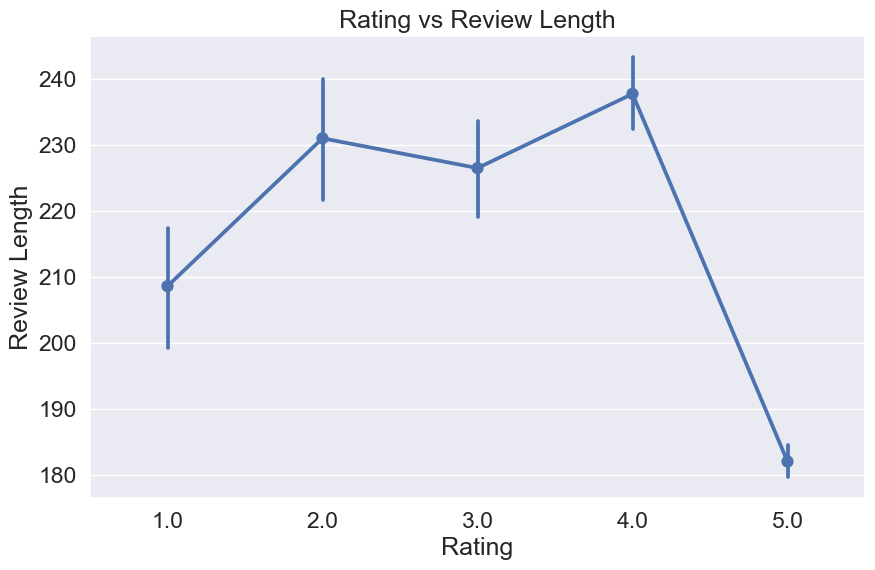

In [80]:
# rating vs text length

plt.figure(figsize=(10, 6))
sns.pointplot(x = "rating", y = "text_len", data = df)
plt.xlabel("Rating")
plt.ylabel("Review Length")
plt.title("Rating vs Review Length")
plt.show()

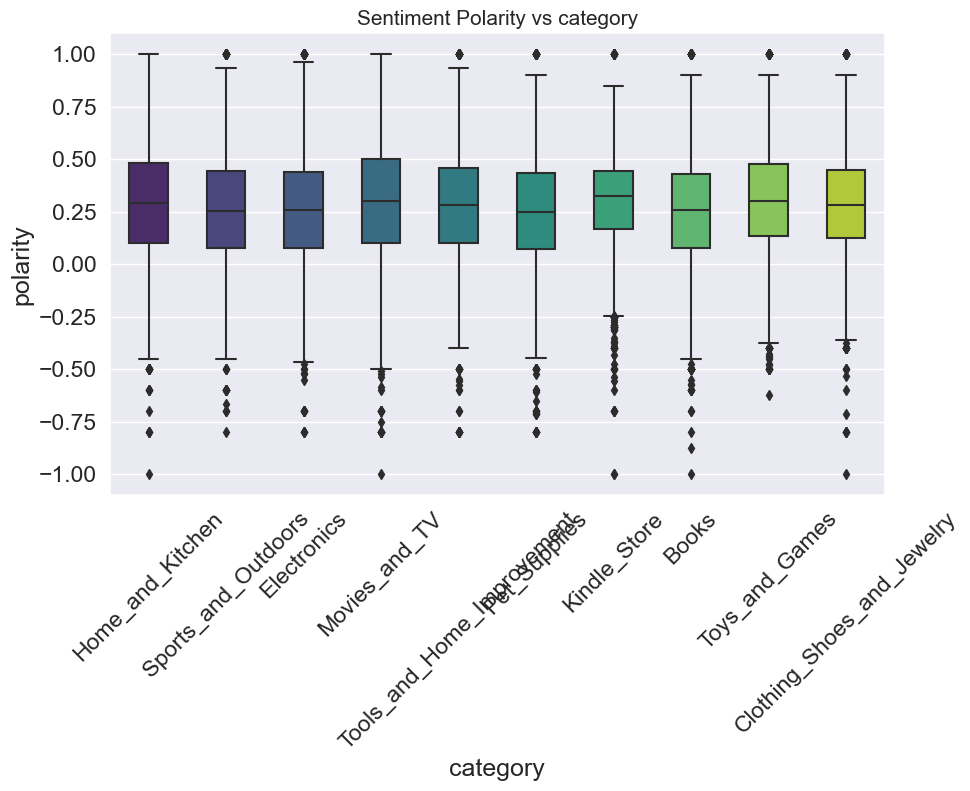

In [81]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='polarity', width=0.5, palette='viridis', data=df)
plt.title('Sentiment Polarity vs category', size=15)
plt.xticks(rotation=45)
plt.show()

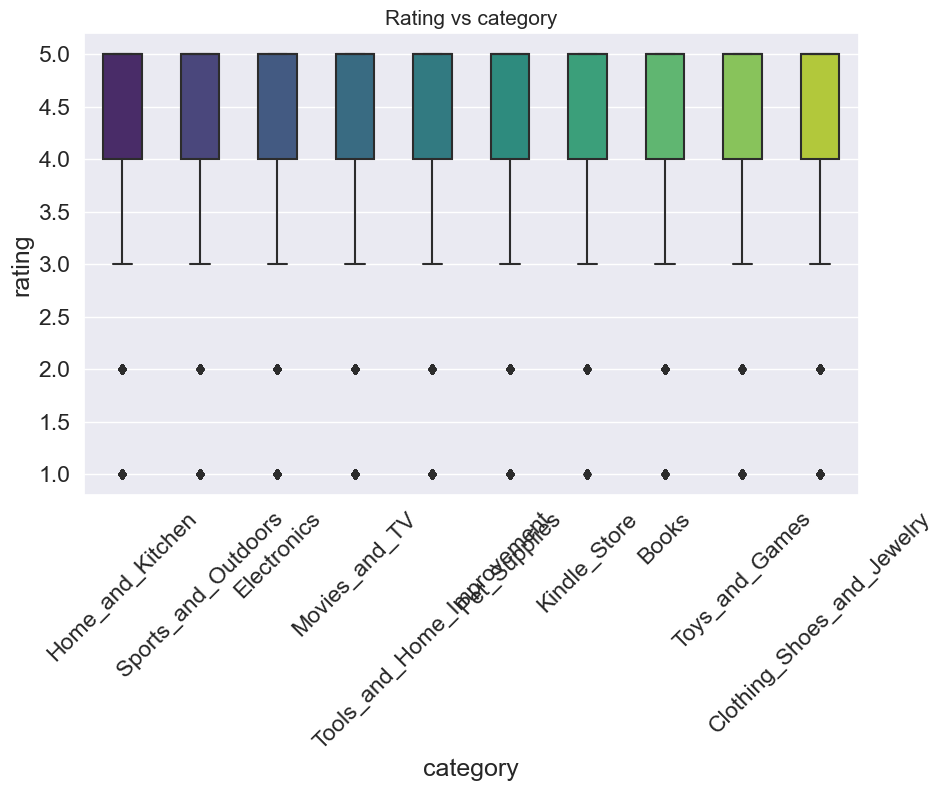

In [82]:
# rating vsv category

plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='rating', width=0.5, palette='viridis', data=df)
plt.title('Rating vs category', size=15)
plt.xticks(rotation=45)
plt.show()

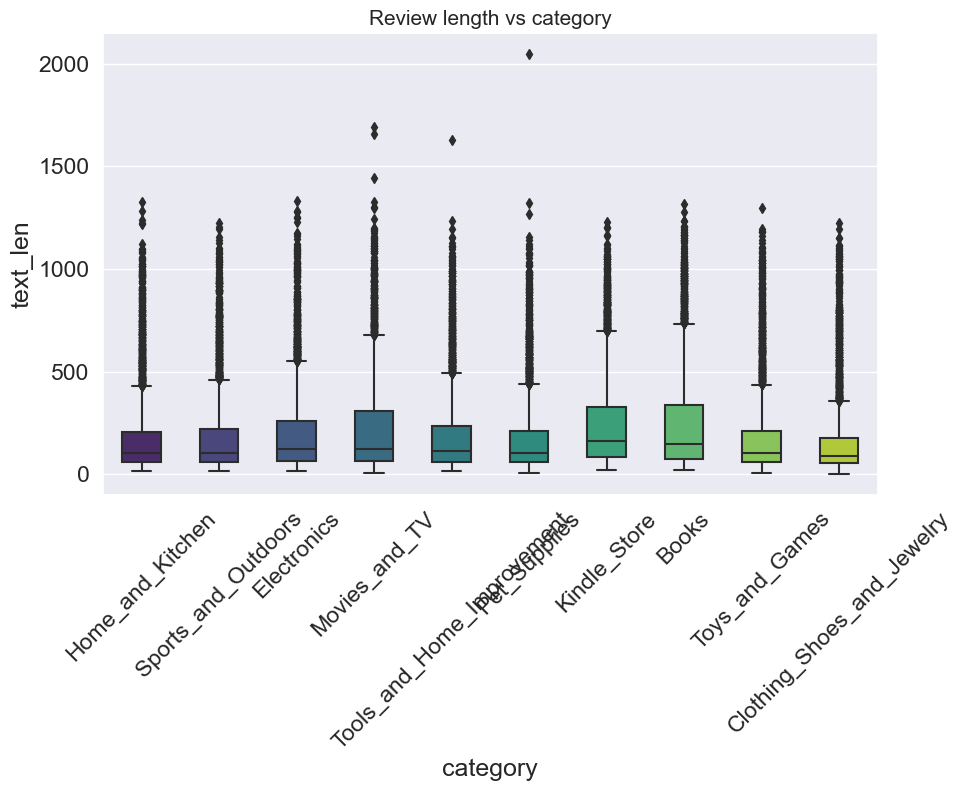

In [83]:
# review vs word length

plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='text_len', width=0.5, palette='viridis', data=df)
plt.title('Review length vs category', size=15)
plt.xticks(rotation=45)
plt.show()

In [84]:
df.to_csv('preprocessed.csv')

# New Section for Model Training starts here

## run the data frame from here

In [85]:
new_df = pd.read_csv('preprocessed.csv')

In [86]:
new_df.head()

,Unnamed: 0,category,rating,label,text,text_len,word_count,polarity
0,0,Home_and_Kitchen,5.0,CG,love well made sturdi comfort i love veri pretti,48,9,0.50
1,1,Home_and_Kitchen,5.0,CG,love great upgrad origin i 've mine coupl year,46,9,0.65
2,2,Home_and_Kitchen,5.0,CG,thi pillow save back i love look feel pillow,44,9,0.25
3,3,Home_and_Kitchen,1.0,CG,miss inform use great product price i,37,7,0.80
4,4,Home_and_Kitchen,5.0,CG,veri nice set good qualiti we set two month,43,9,0.65


In [87]:
new_df.drop('Unnamed: 0',axis=1,inplace=True)

In [88]:
new_df.head()

,category,rating,label,text,text_len,word_count,polarity
0,Home_and_Kitchen,5.0,CG,love well made sturdi comfort i love veri pretti,48,9,0.50
1,Home_and_Kitchen,5.0,CG,love great upgrad origin i 've mine coupl year,46,9,0.65
2,Home_and_Kitchen,5.0,CG,thi pillow save back i love look feel pillow,44,9,0.25
3,Home_and_Kitchen,1.0,CG,miss inform use great product price i,37,7,0.80
4,Home_and_Kitchen,5.0,CG,veri nice set good qualiti we set two month,43,9,0.65


In [89]:
new_df.dropna(inplace=True)
new_df['length'] = df['text'].apply(len)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40398 entries, 0 to 40398
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   category    40398 non-null  object 
 1   rating      40398 non-null  float64
 2   label       40398 non-null  object 
 3   text        40398 non-null  object 
 4   text_len    40398 non-null  int64  
 5   word_count  40398 non-null  int64  
 6   polarity    40398 non-null  float64
 7   length      40365 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 2.8+ MB


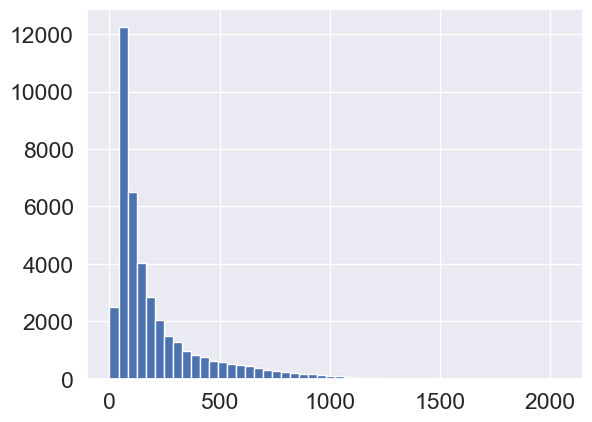

In [90]:
plt.hist(new_df['length'],bins=50)
plt.show()

In [91]:
new_df.groupby('label').describe()

rating                                              text_len  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20183.0  4.258733  1.141615  1.0  4.0  5.0  5.0  5.0  20183.0   
OR     20215.0  4.253228  1.147668  1.0  4.0  5.0  5.0  5.0  20215.0   

                   ...  polarity        length                               \
             mean  ...       75%  max    count        mean         std  min   
label              ...                                                        
CG     171.786850  ...  0.493584  1.0  20165.0  199.709298  214.249616  6.0   
OR     230.135939  ...  0.400000  1.0  20200.0  201.107871  206.991177  0.0   

                                   
        25%    50%    75%     max  
label                              
CG     59.0  110.0  249.0  1629.0  
OR     67.0  118.0  247.0  2046.0  

[2 rows x 40 columns]

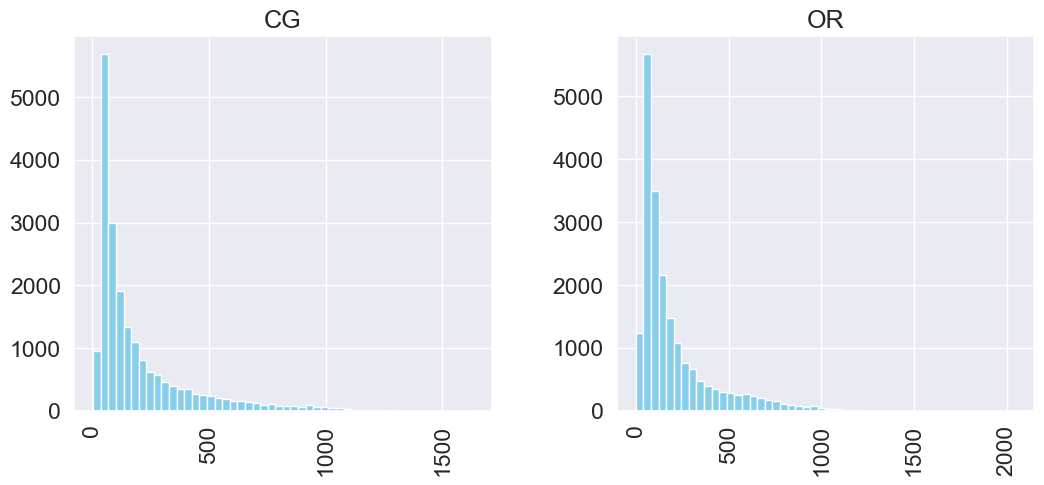

In [92]:
new_df.hist(column='length',by='label',bins=50,color='skyblue',figsize=(12,5))
plt.show()

In [93]:
new_df[new_df['label']=='OR'][['text','length']].sort_values(by='length',ascending=False).head().iloc[0].text

"i attempt use bark collar time sent back variou reason thi one perfect the charg system excel it rubber flap stay secur collar mani n't provid simpl flap the avail set number gradual increas shock dog react it human dog know far take it allow still guard littl grumbl enough get point across stop loud bark she know duti she calm immedi 's it take consist use like train i saw result within day i use month put big deal the import thing i n't feel guilti use she learn quickli got shock time understood limit it hard hear yelp shock i stuck honestli learn quickli result amaz she never get shock i put it help relax keep check a long insan bark deliveri peopl stranger dog walker kid skateboard bark dog ceas the downsid 's fairli larg i hate see big box neck but get around they pretti ugli i tri smaller one it look better n't enough power work effici te suggest i offer differ color instead black"

In [94]:
new_df.length.describe()

count    40365.000000
mean       200.409191
std        210.647066
min          0.000000
25%         63.000000
50%        114.000000
75%        248.000000
max       2046.000000
Name: length, dtype: float64

In [95]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [96]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x000002076DE98860>)

In [97]:
bow_transformer.fit(new_df['text'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 16598


In [98]:
review4 = new_df['text'][3]
review4

'miss inform use great product price i'

In [99]:
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)

  (0, 6133)	1
  (0, 7201)	1
  (0, 9218)	1
  (0, 11189)	1
  (0, 11257)	1
  (0, 15562)	1
(1, 16598)


In [101]:
print(bow_transformer.get_feature_names_out()[6133])
print(bow_transformer.get_feature_names_out()[7201])
print(bow_transformer.get_feature_names_out()[9218])
print(bow_transformer.get_feature_names_out()[11189])
print(bow_transformer.get_feature_names_out()[11257])
print(bow_transformer.get_feature_names_out()[15562])

great
inform
miss
price
product
use


In [103]:
# converts the raw text data into numerical data
bow_reviews = bow_transformer.transform(new_df['text'])

In [104]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (40398, 16598)
Amount of non zero values in the bag of words model: 992975


In [105]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.15


In [106]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

  (0, 6133)	1
  (0, 7201)	1
  (0, 9218)	1
  (0, 11189)	1
  (0, 11257)	1
  (0, 15562)	1


In [108]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape: (40398, 16598)
No. of Dimensions: 2


## Model Building

## create training and testing data

In [109]:
# splitting the dataset into train and test set with the testing size of 0.3
review_train, review_test, label_train, label_test = train_test_split(df['text'],df['label'],test_size=0.3)

### Multinomial Naive Bayes

In [110]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint

In [111]:
# pipeline for MNB model
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [112]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002076DE98860>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [113]:
predictions = pipeline.predict(review_test)
predictions

array(['OR', 'OR', 'OR', ..., 'OR', 'OR', 'OR'], dtype='<U2')

In [114]:
print('Classification Report:',classification_report(label_test,predictions))
print('Confusion Matrix:',confusion_matrix(label_test,predictions))
print('Accuracy Score:',accuracy_score(label_test,predictions))

Classification Report:               precision    recall  f1-score   support

          CG       0.82      0.88      0.85      6048
          OR       0.87      0.81      0.84      6072

    accuracy                           0.85     12120
   macro avg       0.85      0.85      0.84     12120
weighted avg       0.85      0.85      0.84     12120

Confusion Matrix: [[5327  721]
 [1157 4915]]
Accuracy Score: 0.845049504950495


In [116]:
print('MNB Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

MNB Prediction Accuracy: 84.5%


#### Grid Search for best param for MNB

In [ ]:
pipeline_mnb = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

# Define the parameter grid
param_grid_mnb = {
    'bow__ngram_range': [(1, 1), (1, 2)],  # Uni-gram or Bi-gram
    'tfidf__use_idf': (True, False),
    'classifier__alpha': [0.1, 0.5, 1.0]
}

# Instantiate the grid search with 5-fold cross-validation
grid_search_mnb = GridSearchCV(pipeline_mnb, param_grid_mnb, cv=5, n_jobs=1, verbose=2)

# Perform the grid search
grid_search_mnb.fit(review_train, label_train)

# Report the results
print("Best Parameters for MNB:", grid_search_mnb.best_params_)

### Refined Model with best parameters for MNB

In [118]:
best_params_mnb = {
    'bow__ngram_range': (1, 1),
    'tfidf__use_idf': True,
    'classifier__alpha': 0.5
}

# Define the pipeline with the best parameters
pipeline_mnb_best = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process, ngram_range=best_params_mnb['bow__ngram_range'])),
    ('tfidf', TfidfTransformer(use_idf=best_params_mnb['tfidf__use_idf'])),
    ('classifier', MultinomialNB(alpha=best_params_mnb['classifier__alpha']))
])

# Fit the pipeline on the training data
pipeline_mnb_best.fit(review_train, label_train)

# Predictions on the test data
predictions_mnb_best = pipeline_mnb_best.predict(review_test)

mnb_accuracy = accuracy_score(label_test, predictions_mnb_best)

# Print the accuracy
print("Accuracy of the Multinomial Naive Bayes model:", mnb_accuracy)

Accuracy of the Multinomial Naive Bayes model: 0.8471947194719472


In [119]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(label_test,predictions_mnb_best))

from sklearn import metrics
metrics.accuracy_score(label_test, predictions_mnb_best)

              precision    recall  f1-score   support

          CG       0.83      0.87      0.85      6048
          OR       0.87      0.82      0.84      6072

    accuracy                           0.85     12120
   macro avg       0.85      0.85      0.85     12120
weighted avg       0.85      0.85      0.85     12120



0.8471947194719472

### Random Forest

In [120]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [121]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002076DE98860>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [122]:
rfc_pred = pipeline.predict(review_test)
rfc_pred

array(['OR', 'OR', 'CG', ..., 'OR', 'OR', 'OR'], dtype=object)

In [123]:
print('Classification Report:',classification_report(label_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,rfc_pred))
print('Accuracy Score:',accuracy_score(label_test,rfc_pred))

Classification Report:               precision    recall  f1-score   support

          CG       0.82      0.88      0.84      6048
          OR       0.87      0.80      0.83      6072

    accuracy                           0.84     12120
   macro avg       0.84      0.84      0.84     12120
weighted avg       0.84      0.84      0.84     12120

Confusion Matrix: [[5298  750]
 [1202 4870]]
Accuracy Score: 0.838943894389439


In [125]:
print('Random Forest Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')

Random Forest Prediction Accuracy: 83.89%


#### Grid Search for best param for RF

In [ ]:
# Define the pipeline
pipeline_rf = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])

# Define the parameter distributions for RandomizedSearchCV
param_dist_rf = {
    'classifier__n_estimators': randint(50, 200),  # Random integer values between 50 and 200
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': randint(2, 10),  # Random integer values between 2 and 10
    'classifier__min_samples_leaf': randint(1, 5),    # Random integer values between 1 and 5
    'classifier__max_features': ['auto', 'sqrt']
}

# Instantiate the RandomizedSearchCV with 5-fold cross-validation
random_search_rf = RandomizedSearchCV(pipeline_rf, param_dist_rf, cv=5, n_iter=50, n_jobs=1, verbose=2)

# Perform the randomized search
random_search_rf.fit(review_train, label_train)

# Report the results
print("Best Parameters for Random Forest (Randomized Search):", random_search_rf.best_params_)

### Refined model with best parameter for Random Forest

In [126]:
best_params_rf = {
    'n_estimators': 153,
    'max_depth': None,
    'min_samples_split': 7,
    'min_samples_leaf': 1,
    'max_features': 'sqrt'
}

# Define the pipeline with the best parameters
pipeline_rf_best = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier(**best_params_rf))
])

# Fit the model on the training data
pipeline_rf_best.fit(review_train, label_train)

# Now you can use this fitted pipeline for prediction or evaluation
rf_predictions_best = pipeline_rf_best.predict(review_test)

rf_accuracy = accuracy_score(label_test, rf_predictions_best)
print("Accuracy of the Random Forest model:", rf_accuracy)

Accuracy of the Random Forest model: 0.8384488448844885


In [127]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(label_test,rf_predictions_best))

from sklearn import metrics
metrics.accuracy_score(label_test, rf_predictions_best)

              precision    recall  f1-score   support

          CG       0.82      0.87      0.84      6048
          OR       0.86      0.81      0.83      6072

    accuracy                           0.84     12120
   macro avg       0.84      0.84      0.84     12120
weighted avg       0.84      0.84      0.84     12120



0.8384488448844885

### Support Vector Machine

In [128]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [129]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002076DE98860>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [130]:
svc_pred = pipeline.predict(review_test)
svc_pred

array(['OR', 'OR', 'OR', ..., 'OR', 'OR', 'OR'], dtype=object)

In [131]:
print('Classification Report:',classification_report(label_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,svc_pred))
print('Accuracy Score:',accuracy_score(label_test,svc_pred))

Classification Report:               precision    recall  f1-score   support

          CG       0.90      0.86      0.88      6048
          OR       0.87      0.90      0.89      6072

    accuracy                           0.88     12120
   macro avg       0.88      0.88      0.88     12120
weighted avg       0.88      0.88      0.88     12120

Confusion Matrix: [[5218  830]
 [ 590 5482]]
Accuracy Score: 0.8828382838283828


In [144]:
print('SVC Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

SVC Prediction Accuracy: 88.28%


#### Grid Search for best param for svm

In [ ]:
# Define the pipeline
pipeline_svc = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', SVC())
])

# Define the parameter grid
param_grid_svc = {
    'classifier__C': [0.1, 1, 10], 
    'classifier__kernel': ['linear', 'rbf']
}

# Instantiate the grid search with 5-fold cross-validation
grid_search_svc = GridSearchCV(pipeline_svc, param_grid_svc, cv=5, n_jobs=1, verbose=2)

# Perform the grid search
grid_search_svc.fit(review_train, label_train)

# Report the results
print("Best Parameters for SVC:", grid_search_svc.best_params_)

### Rebuild SVC model with best parameters

In [133]:
best_params_svc = {
    'C': 10,
    'kernel': 'rbf'
}

pipeline_svc_best = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', SVC(**best_params_svc))
])

# Fit the model on the training data
pipeline_svc_best.fit(review_train, label_train)

# Now you can use this fitted pipeline for prediction or evaluation
svc_predictions_best = pipeline_svc_best.predict(review_test)

svc_accuracy = accuracy_score(label_test, svc_predictions_best)
print("Accuracy of the SVC model:", svc_accuracy)

Accuracy of the SVC model: 0.8907590759075907


In [134]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(label_test,svc_predictions_best))

from sklearn import metrics
metrics.accuracy_score(label_test, svc_predictions_best)

              precision    recall  f1-score   support

          CG       0.90      0.88      0.89      6048
          OR       0.88      0.90      0.89      6072

    accuracy                           0.89     12120
   macro avg       0.89      0.89      0.89     12120
weighted avg       0.89      0.89      0.89     12120



0.8907590759075907

### Logistic Regression

In [135]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [136]:

pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002076DE98860>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [137]:
lr_pred = pipeline.predict(review_test)
lr_pred

array(['OR', 'OR', 'OR', ..., 'OR', 'OR', 'OR'], dtype=object)

In [138]:
print('Classification Report:',classification_report(label_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(label_test,lr_pred))
print('Accuracy Score:',accuracy_score(label_test,lr_pred))

Classification Report:               precision    recall  f1-score   support

          CG       0.87      0.85      0.86      6048
          OR       0.85      0.88      0.86      6072

    accuracy                           0.86     12120
   macro avg       0.86      0.86      0.86     12120
weighted avg       0.86      0.86      0.86     12120

Confusion Matrix: [[5118  930]
 [ 738 5334]]
Accuracy Score: 0.8623762376237624


In [139]:
print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')

Logistic Regression Prediction Accuracy: 86.24%


#### Grid Search for best param for LR

In [ ]:
pipeline_lr = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', LogisticRegression())
])

# Define the parameter grid
param_grid_lr = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2']
}

# Instantiate the grid search with 5-fold cross-validation
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, n_jobs=1, verbose=2)

# Perform the grid search
grid_search_lr.fit(review_train, label_train)

# Report the results
print("Best Parameters for Linear Regression:", grid_search_lr.best_params_)


### Refined model for Linear Regression with best parameters

In [140]:
best_params_lr = {
    'C': 10,
    'penalty': 'l2'
}

pipeline_lr_best = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', LogisticRegression(**best_params_lr))
])

# Fit the model on the training data
pipeline_lr_best.fit(review_train, label_train)

# Now you can use this fitted pipeline for prediction or evaluation
lr_predictions_best = pipeline_lr_best.predict(review_test)

lr_accuracy = accuracy_score(label_test, lr_predictions_best)
print("Accuracy of the LR model", lr_accuracy)

Accuracy of the LR model 0.8695544554455445


In [141]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(label_test,lr_predictions_best))

from sklearn import metrics
metrics.accuracy_score(label_test, lr_predictions_best)

              precision    recall  f1-score   support

          CG       0.87      0.87      0.87      6048
          OR       0.87      0.87      0.87      6072

    accuracy                           0.87     12120
   macro avg       0.87      0.87      0.87     12120
weighted avg       0.87      0.87      0.87     12120



0.8695544554455445

# Model Accuracy Summarizer

In [142]:
lr_accuracy = np.round(accuracy_score(label_test, lr_pred) * 100, 2)
rfc_accuracy = np.round(accuracy_score(label_test, rfc_pred) * 100, 2)
svc_accuracy = np.round(accuracy_score(label_test, svc_pred) * 100, 2)
nb_accuracy = np.round(accuracy_score(label_test, predictions) * 100, 2)

# Create DataFrame
models = pd.DataFrame({
    'Model': ['Multinomial Naive Bayes', 'Random Forests Classifier','Support Vector Machines', 'Logistic Regression'], 
    'Accuracy': [nb_accuracy, rfc_accuracy, svc_accuracy, lr_accuracy]
})

models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Support Vector Machines,88.28
3,Logistic Regression,86.24
0,Multinomial Naive Bayes,84.50
1,Random Forests Classifier,83.89


# Refined Model Accuracy Summarizer

In [143]:
lr_accuracy = np.round(accuracy_score(label_test, lr_predictions_best)* 100, 2)
svc_accuracy = np.round(accuracy_score(label_test, svc_predictions_best) * 100, 2)
rf_accuracy = np.round(accuracy_score(label_test, rf_predictions_best) * 100, 2)
mnb_accuracy = np.round(accuracy_score(label_test, predictions_mnb_best) * 100, 2)

new_models = pd.DataFrame({
    'Model': ['Multinomial Naive Bayes', 'Random Forests Classifier','Support Vector Machines', 'Logistic Regression'], 
    'Accuracy': [mnb_accuracy, rf_accuracy, svc_accuracy, lr_accuracy]
})

new_models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Support Vector Machines,89.08
3,Logistic Regression,86.96
0,Multinomial Naive Bayes,84.72
1,Random Forests Classifier,83.84
